In [1]:
import pandas as pd
import numpy as np
import requests
import return_models
import risk_models
import main
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
#API Keys stored in alpha_vantage.txt file
API_KEY = open('alphavantage_api_keys.txt').read()

In [3]:
tickers = ['AC.TO','ZSP.TO','XFN.TO','HEU.TO','XIT.TO']

price_data = []
for ticker in tickers:
    r = requests.get(f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol={ticker}&outputsize=full&apikey={API_KEY}').json()

    df = pd.DataFrame(r['Time Series (Daily)'], dtype=float).transpose()

    df = df.reindex(index=df.index[::-1])

    df.index = pd.to_datetime(df.index)
    df = df[((df.index >= pd.to_datetime('2013-01-01')) & (df.index <= pd.to_datetime('2020-06-13')))]

    price_data.append(df[['5. adjusted close']])

df_stocks = pd.concat(price_data, axis=1)
df_stocks.columns = tickers
df_stocks.tail()

,AC.TO,ZSP.TO,XFN.TO,HEU.TO,XIT.TO
2020-06-08,23.39,46.8583,33.7018,29.49,36.76
2020-06-09,21.01,46.7007,33.3643,27.34,36.80
2020-06-10,19.51,46.3953,32.7857,25.17,37.07
2020-06-11,17.85,44.4548,31.3007,20.40,36.06
2020-06-12,19.40,44.8981,31.8986,21.06,36.53


In [4]:
df_metrics = main.main(df_stocks)

In [6]:
df_metrics.head()


,Return,Risk,Sharpe,Weights
0,0.182237,0.206764,0.881379,"[0.215, 0.223, 0.242, 0.072, 0.248]"
1,0.0976614,0.281428,0.347021,"[0.235, 0.366, 0.003, 0.271, 0.125]"
2,0.0418623,0.265889,0.157443,"[0.088, 0.143, 0.303, 0.276, 0.189]"
3,0.147794,0.279246,0.529262,"[0.268, 0.084, 0.021, 0.233, 0.394]"
4,-0.0224961,0.30083,-0.0747802,"[0.039, 0.289, 0.275, 0.36, 0.036]"


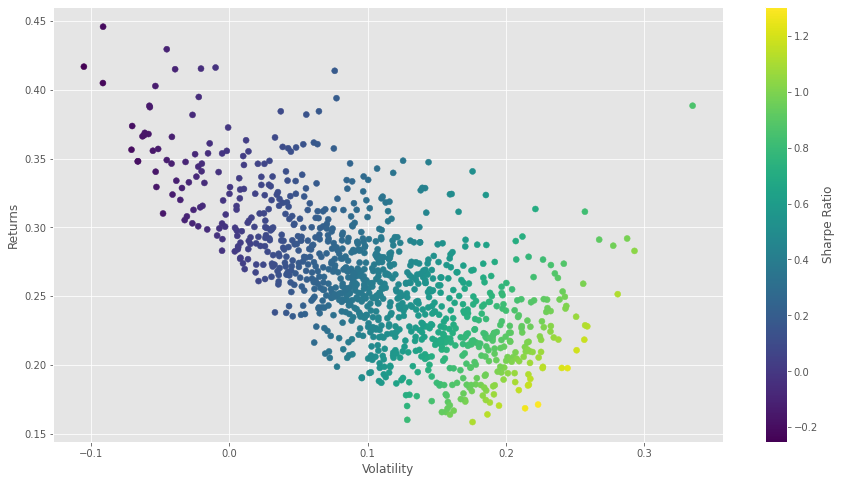

In [5]:
plt.figure(figsize=(15,8))
plt.scatter(df_metrics.Return, df_metrics.Risk, c = df_metrics.Sharpe)

plt.ylabel("Returns")
plt.xlabel("Volatility")
plt.colorbar(label = "Sharpe Ratio")